In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tkinter as tk
from tkinter import messagebox
import folium
import webbrowser
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('../data/new_arabic_dialect_dataset.csv')

In [3]:
import pandas as pd

# Assuming you have a DataFrame called 'data' with columns 'sentence' and 'dialect'

# Create an empty DataFrame to store the sampled sentences
new_data = pd.DataFrame(columns=['sentence', 'dialect', 'sentence_clean'])

# Iterate over each dialect
dialects = data['dialect'].unique()
for dialect in dialects:
    # Select 100 sentences from each dialect
    dialect_sentences = data[data['dialect'] == dialect].sample(n=1000, random_state=42)
    
    # Append the sampled sentences to the new DataFrame
    new_data = new_data.append(dialect_sentences)

# Save the new DataFrame to a CSV file
new_data = new_data.fillna('')
new_data.to_csv('../data/data_sample.csv', index=False)

C:\Users\Fares\AppData\Local\Temp\ipykernel_16488\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\Users\Fares\AppData\Local\Temp\ipykernel_16488\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\Users\Fares\AppData\Local\Temp\ipykernel_16488\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\Users\Fares\AppData\Local\Temp\ipykernel_16488\3269571721.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(dialect_sentences)
C:\U

In [4]:
from sklearn.model_selection import train_test_split

X = new_data.sentence_clean
y = new_data.dialect
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=new_data['dialect'])
print(X_train)

162936                                 نشربو الحليب بالسحلب
20936       مساكين واله ارتاحو الحين وحتى البوك ارتاح الصرف
56339     بالنسبة لي ده حدث أهم حدث محمد صلاح وانجازات ا...
285583                    احترنا معك أنت مدريدي ولا برشلوني
285546    بس بيسمع كلامك بقول الجامعة الاحد الجاي يمكن ا...
                                ...                        
185848                          اوكي ذكريني اقتلش لما اشوفش
231111    ماعليش كني شفت فيه بلاط لحين مالمع عدل شكله ما...
3725      اختلاف ثقافة الحجاج كمية النفايات يعقونها الار...
285794                بالمعنى الآخر يلي مالو قديم مالو جديد
184632                            باغي اجيب الهوش هناك معكم
Name: sentence_clean, Length: 15200, dtype: object


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.model_selection import StratifiedKFold

vectorizer_tfidf = TfidfVectorizer()
classifier_tfidf_Logistic = LogisticRegression(max_iter=1000)

model_tfidf_Logistic = Pipeline([
    ("vectorizer", vectorizer_tfidf),
    #("scaler", StandardScaler(with_mean=False)),
    ("classifier", classifier_tfidf_Logistic)
])

param_grid = {
    "vectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "classifier__C": [0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"]
}

# Perform grid search with cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(model_tfidf_Logistic, param_grid, cv=cv, scoring="accuracy")
grid_search.fit(X_train, y_train)

C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Fares\AppData\Local\Programs\Python\Python311\Lib\si

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2'],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring='accuracy')

In [6]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'classifier__C': 10, 'classifier__penalty': 'l2', 'vectorizer__ngram_range': (1, 2)}
0.3947368421052631


In [7]:
# Fit the model with the best parameters
model_tfidf_Logistic.set_params(**best_params)
model_tfidf_Logistic.fit(X_train, y_train)

# Save the model
joblib.dump(model_tfidf_Logistic, '../models/model_tfidf_Logistic.pkl')

['../models/model_tfidf_Logistic.pkl']

In [8]:
from sklearn.metrics import accuracy_score

saved_model_tfidf_Logistic = joblib.load('../models/model_tfidf_Logistic.pkl')

predicted_train_tfidf_Logistic = saved_model_tfidf_Logistic.predict(X_train)
accuracy_train_tfidf_Logistic = accuracy_score(y_train, predicted_train_tfidf_Logistic)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf_Logistic))

predicted_test_tfidf_Logistic = model_tfidf_Logistic.predict(X_test)
accuracy_test_tfidf_Logistic = accuracy_score(y_test, predicted_test_tfidf_Logistic)
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf_Logistic))

Accuracy Training data: 100.0%
Accuracy Test data: 40.4%


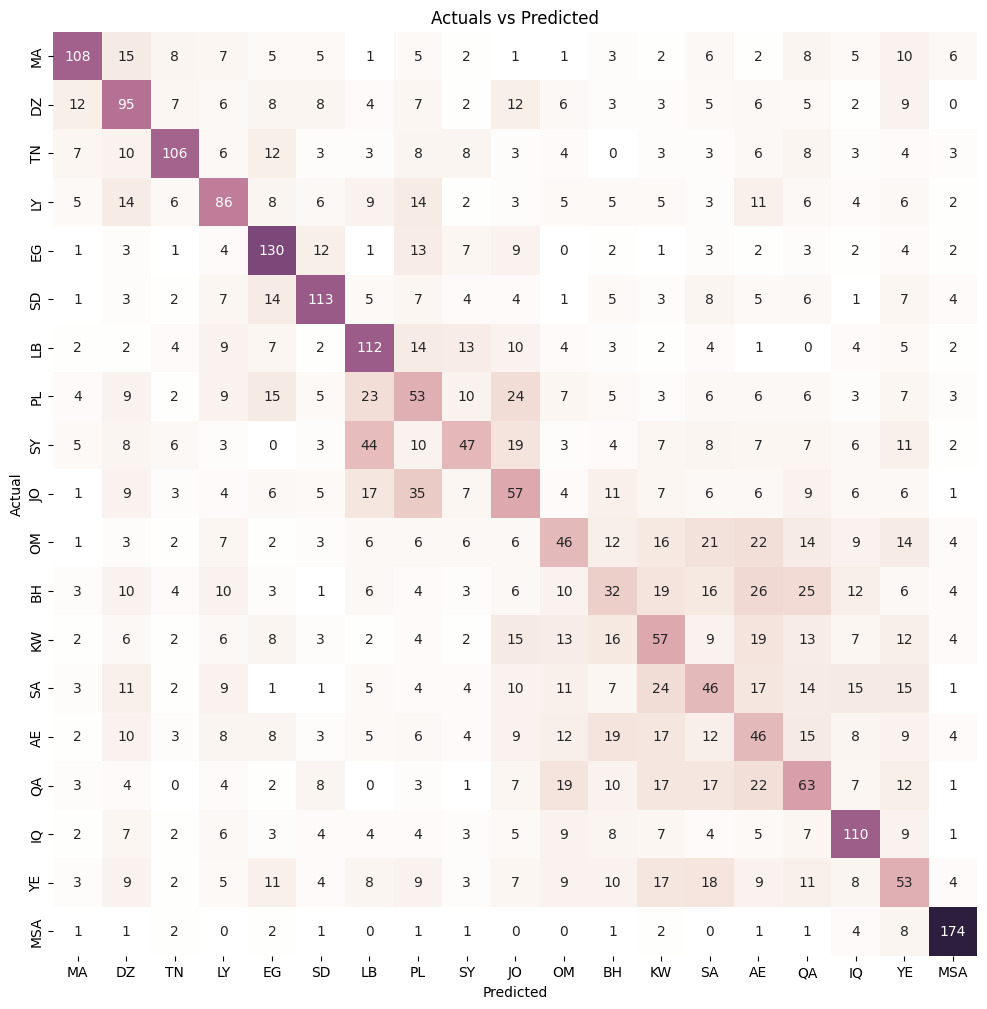

In [9]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(y_test, predicted_test_tfidf_Logistic,labels=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
data_cm = pd.DataFrame(data, columns=["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"], index = ["MA", "DZ","TN","LY","EG","SD","LB","PL","SY","JO","OM","BH","KW","SA","AE","QA","IQ","YE","MSA"])
data_cm.index.name = 'Actual'
data_cm.columns.name = 'Predicted'


f, ax = plt.subplots(figsize=(12, 12))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

sns.heatmap(data_cm, cbar=False, annot=True, cmap=cmap, square=True, fmt='.0f',
            annot_kws={'size':10})
plt.title('Actuals vs Predicted')
plt.show()